In [68]:
from functools import reduce
from numpy import ndarray
import importlib
import numpy as np 
from scipy import special
import scipy
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import pi
from scipy.linalg import logm, expm
import matplotlib.pyplot as plt
import D8_plaquette as D8
importlib.reload(D8)

import D8_group_operators as D8_op

from quspin.basis import spin_basis_1d, tensor_basis, basis_int_to_python_int, spin_basis_general

Hermiticity check:
True


Text(0.5, 1.0, 'eigenvalues of H')

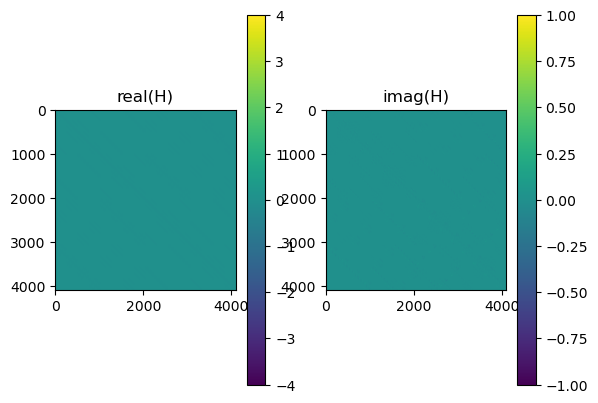

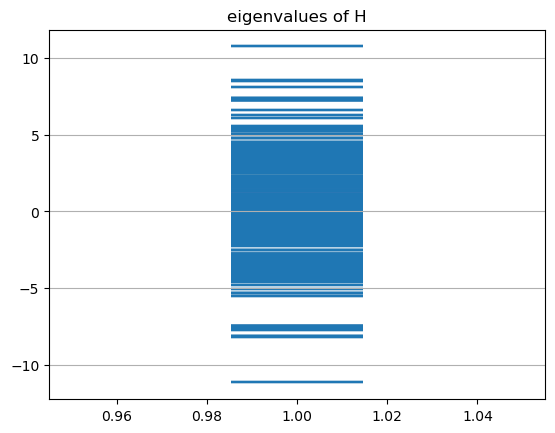

In [69]:
# configuration
L = 4  # number of links
M = 1  # mass constant 
J = 1  # interaction strength
h = 1  # electric term strength (lambda_E in the notes)
lambdaB = 1 #magnetic term strength (lambda_B in the notes)


H_J =  D8.H1(J, True) + D8.H2(J, True) + D8.H3(J, True) + D8.H4(J, True)  


# full Hamiltonian:
H = D8.H_E(h, True) + D8.HB(lambdaB , flip=True) + D8.H_M(J , flip=True) + H_J 
# H = H_E(0, True) + H_J_single_link(J,1)
# check hermiticity
print("Hermiticity check:")
print(scipy.linalg.ishermitian(H))

# plot hamiltonian
fig, axs = plt.subplots(1, 2)
p1 = axs[0].imshow(np.real(H))
p2 = axs[1].imshow(np.imag(H))
fig.colorbar(p1)
fig.colorbar(p2)

axs[0].title.set_text('real(H)')
axs[1].title.set_text('imag(H)')

# plot spectrum
levels = np.linalg.eigvals(H)
x = np.ones(np.size(levels))
# x = np.arange(len(levels))
levels = np.sort(levels)
plt.figure()

plt.scatter(x, np.real(levels), marker="_", s=9000)
plt.grid(axis='y')
plt.title("eigenvalues of H")


In [70]:
TL1 = D8_op.TL(1)
TL3 = D8_op.TL(3)
TL5 = D8_op.TL(5)
TL7 = D8_op.TL(7)
TR1 = D8_op.TR(1)
TR3 = D8_op.TR(3)
TR5 = D8_op.TR(5)
TR7 = D8_op.TR(7)
I_link = np.eye(8)

In [71]:
#Bulding the extra constraint on the different verteces(these are written in the BDBDBD basis, B = qubit and D = qudit)

#first vertex (even):
g1 = (1/2)*(np.kron(np.kron(np.kron( TL1, I_link), I_link), TL1) + np.kron(np.kron(np.kron( TL3, I_link), I_link), TL3) + np.kron(np.kron(np.kron( TL5, I_link), I_link), TL5) - np.kron(np.kron(np.kron( TL7, I_link), I_link), TL7))

#second vertex (even):
g2 = (1/2)*(np.kron(np.kron(np.kron( TR1.T, TL1), I_link), I_link) + np.kron(np.kron(np.kron( TR3.T, TL3), I_link), I_link) - np.kron(np.kron(np.kron( TR5.T, TL5), I_link), I_link) + np.kron(np.kron(np.kron( TR7.T, TL7), I_link), I_link))

#third vertex (even):
g3 = (1/2)*(np.kron(np.kron(np.kron(I_link, TR1.T), TR1.T), I_link) + np.kron(np.kron(np.kron(I_link, TR3.T), TR3.T), I_link) + np.kron(np.kron(np.kron(I_link, TR5.T), TR5.T), I_link) - np.kron(np.kron(np.kron(I_link, TR7.T), TR7.T), I_link))

#fourth vertex (odd site)

g4 = (1/2)*(np.kron(np.kron(np.kron(I_link, I_link), TL1), TR1.T) + np.kron(np.kron(np.kron(I_link, I_link), TL3), TR3.T) - np.kron(np.kron(np.kron(I_link, I_link), TL5), TR5.T) + np.kron(np.kron(np.kron(I_link, I_link), TL7), TR7.T))

In [72]:
#The Hamiltonian has been written in the BBBBDDDD basis and therefore we define a transformation that allows us to 
#pass to this basis.

# flip order of levels to fit with the quspin convention
U2 = np.fliplr(np.eye(2**4))  # for the qubits
U4 = np.fliplr(np.eye(4**4))  # for the qudits
UU = np.kron(U2, U4)

G1 = UU@D8_op.change_basis(g1)@UU
G2 = UU@D8_op.change_basis(g2)@UU
G3 = UU@D8_op.change_basis(g3)@UU
G4 = UU@D8_op.change_basis(g4)@UU


# convert:
#plt.imshow(G1)
#plt.title("G1 converted to the BBBBDDDD basis")
#plt.savefig('finale.png')
#plt.show()

In [73]:
commutator_result = np.dot(H, G2) - np.dot(G2, H)
len(commutator_result)

4096

In [74]:
count1 = 0
count2 = 0 
for i in range(512):
    for j in range(512):
        if commutator_result[i][j] != 0:
            print(commutator_result[i][j])
            if commutator_result[i][j] > 0:
                count1 = count1 + 1
            else:
                count2 = count2 + 1

In [75]:
count1

0

In [76]:
count2

0

In [77]:
def comm(A,B):
    return A@B - B@A

com = comm(H, G1 + G3+ G2 + G4)
# com = comm(D8.H1(J,True), G1 + G3+ G2 + G4)
print((np.abs(com)>1e-12).any())

False


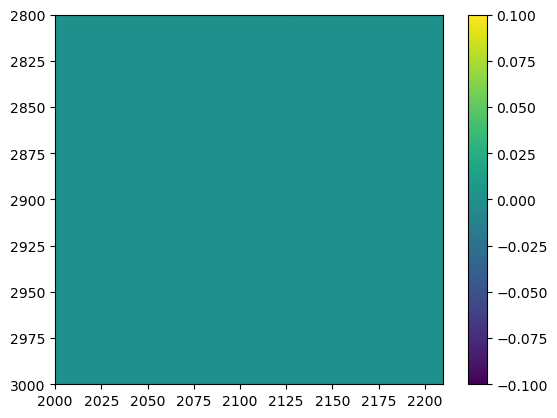

In [78]:
plt.imshow(np.abs(com))
plt.colorbar()
plt.xlim([2000,2210])
plt.ylim([3000,2800])
plt.show()

In [79]:
lam = 10
eignval, eignvec = scipy.linalg.eigh(H)
print(eignval[0])
I = np.eye(8**4)
eignval1, eignvec1 = scipy.linalg.eigh(H + lam*((G1-I)@(G1-I) + (G2-I)@(G2-I) +(G3-I)@(G3-I) +(G4-I)@(G4-I)))
print(eignval1[0])


-11.166302653894045
-11.166302653894036


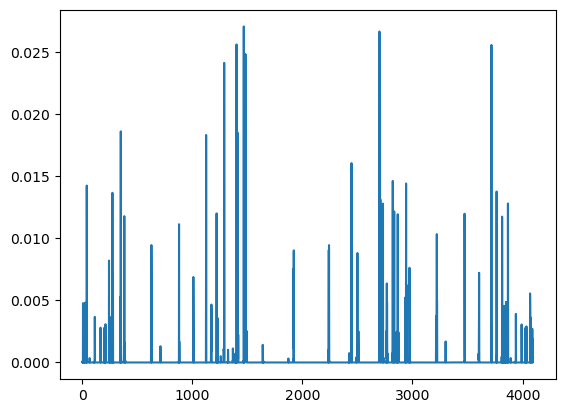

In [80]:
plt.plot(np.abs(eignvec1[0])**2)
plt.show()      



In [81]:
eignval, eignvec = scipy.linalg.eigh(G1)
for i in range(4096):
    print(eignval[i])

-1.0000000000000075
-1.000000000000007
-1.0000000000000069
-1.0000000000000069
-1.0000000000000069
-1.0000000000000069
-1.0000000000000069
-1.0000000000000069
-1.0000000000000067
-1.0000000000000067
-1.0000000000000067
-1.0000000000000067
-1.0000000000000067
-1.0000000000000067
-1.0000000000000067
-1.0000000000000067
-1.0000000000000064
-1.0000000000000064
-1.0000000000000064
-1.0000000000000064
-1.0000000000000064
-1.0000000000000064
-1.0000000000000064
-1.0000000000000062
-1.0000000000000062
-1.0000000000000062
-1.0000000000000062
-1.0000000000000062
-1.000000000000006
-1.000000000000006
-1.000000000000006
-1.000000000000006
-1.000000000000006
-1.000000000000006
-1.000000000000006
-1.000000000000006
-1.0000000000000058
-1.0000000000000058
-1.0000000000000058
-1.0000000000000058
-1.0000000000000058
-1.0000000000000058
-1.0000000000000058
-1.0000000000000058
-1.0000000000000056
-1.0000000000000056
-1.0000000000000056
-1.0000000000000056
-1.0000000000000056
-1.0000000000000056
-1.000000